<a href="https://colab.research.google.com/github/Pambao/MIP/blob/main/Problem_Set_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install xlrd

In [2]:
import csv
import os
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image, ImageDraw, ImageFont

## Step 1: Visualize data

In [4]:
# This function used to draw contour of object to visualize
def draw_object(image, annotations):
  labels = {0: 'rectangle', 1: 'elispe', 2:'polygon'}
  contour_color = (0, 255, 0)
  width = 20
  draw = ImageDraw.Draw(image, mode = 'RGB')
  for annotation in annotations.split(';'):
    annotation = list(map(int, annotation.split(' ')))
    if annotation[0] == 0:
      draw.rectangle(annotation[1:], outline=contour_color, width=width)
    elif annotation[0] == 1:
      draw.ellipse(annotation[1:], outline=contour_color, width=width)
    elif annotation[0] == 2:
      annotation.append(annotation[1])
      annotation.append(annotation[2])
      draw.line(annotation[1:], fill=contour_color, width=width)
    draw.text(
        (annotation[1], annotation[2] - width), 
        labels.get(annotation[0]),
        fill = 'red',
        font=ImageFont.truetype('/content/drive/MyDrive/MIP Resource/arial.ttf', 100)
        )

8000 pictures in /content/drive/MyDrive/MIP Resource/ChestXrayDataSet/customDataSet/images/train
1000 pictures in /content/drive/MyDrive/MIP Resource/ChestXrayDataSet/customDataSet/images/dev


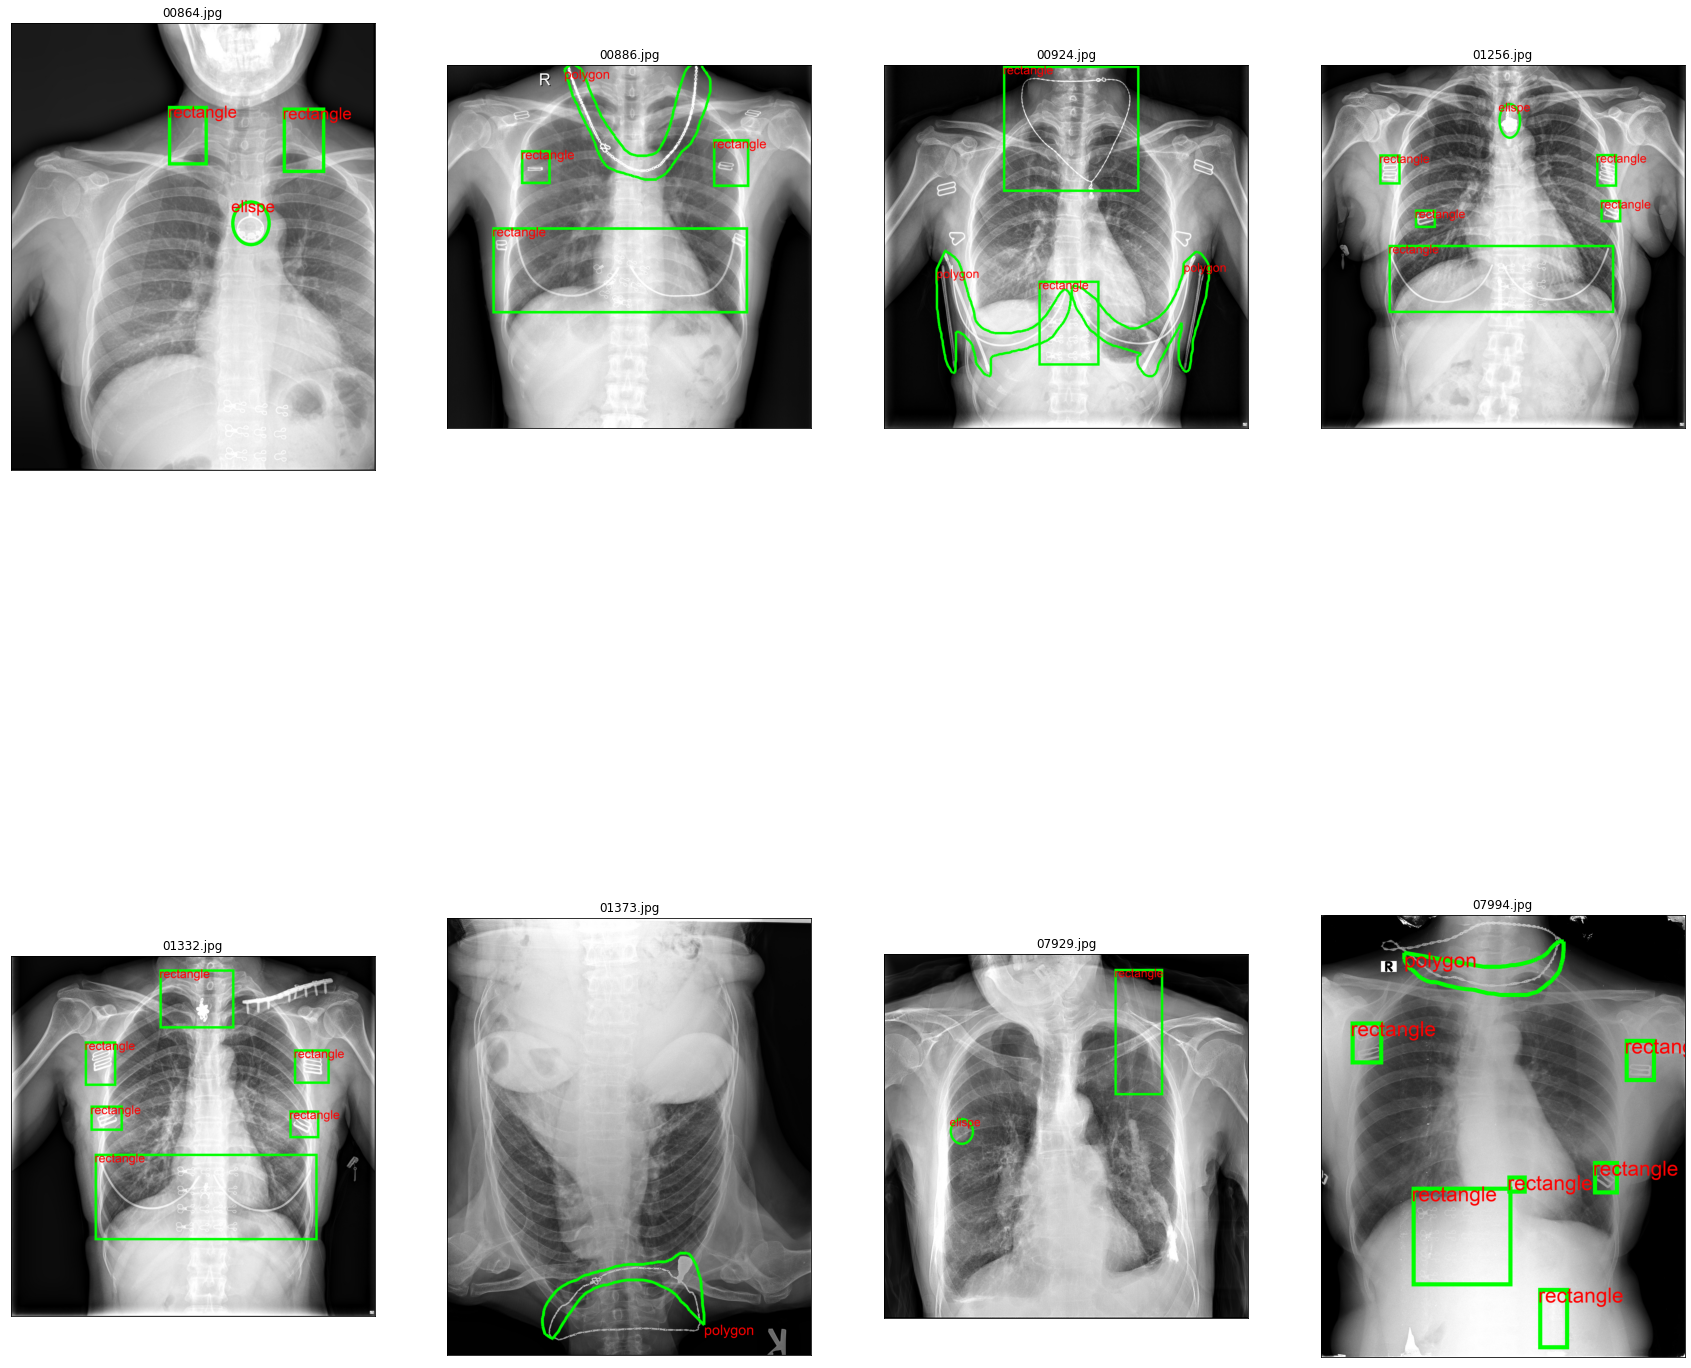

In [5]:
DIRECTORY = '/content/drive/MyDrive/MIP Resource/ChestXrayDataSet/object-CXR/'
IMAGES_DIRECTORY = '/content/drive/MyDrive/MIP Resource/ChestXrayDataSet/customDataSet/images/'
SUBDIR = ['train', 'dev']

for dir in SUBDIR:
  print(f'{len(os.listdir(IMAGES_DIRECTORY + dir))} pictures in {IMAGES_DIRECTORY}{dir}')

samples = [864, 886, 924, 1256, 1332, 1373, 7929, 7994]
fig, axs = plt.subplots(2, 4, subplot_kw=dict(xticks=[], yticks=[]), figsize=(30, 30))
axs = list(axs[0]) + list(axs[1])

file = open(DIRECTORY + 'train.csv')
csv_file = list(csv.reader(file))

# Iterate images through sample list and get its annotations
for sample, ax in zip(samples, axs):
  line = csv_file[sample]
  image_name = line[0]
  annotations = line[1]
  image = Image.open(IMAGES_DIRECTORY + 'train/' + image_name).convert('RGB')
  draw_object(image, annotations)
  ax.set_title(image_name)
  ax.imshow(image)

## Build custom dataset

In [11]:
import csv
import os
import sys

from pathlib import Path
from PIL import Image

In [ ]:
% cd /content/drive/MyDrive/MIP Resource/ChestXrayDataSet

/content/drive/MyDrive/MIP Resource/ChestXrayDataSet


In [ ]:
!mkdir customDataSet

In [21]:
DIRECTORY = '/content/drive/MyDrive/MIP Resource/ChestXrayDataSet/object-CXR/'
IMAGE_DIR = '/content/drive/MyDrive/MIP Resource/ChestXrayDataSet/customDataSet/images/'
CATEGORIES = ['train', 'dev']

lables_path = Path(f'{DIRECTORY}labels')
lables_path.mkdir(parents=True, exist_ok=True)
for category in CATEGORIES:
  lables_path = Path(f'{DIRECTORY}labels/{category}')
  lables_path.mkdir(parents=True, exist_ok=True)

  file = open(DIRECTORY + category + '.csv')
  csv_file = list(csv.reader(file))
  counter = 0
  for line in csv_file[1:]:
    image_id = (line[0].split('.'))[0]
    sys.stdout.write("\rFile %s %i" %(image_id, counter))
    sys.stdout.flush()

    if(line[1] != ''):
      counter += 1

      image_lable_file = f'{image_id}.txt'
      labels_file = open(f'{DIRECTORY}labels/{category}/{image_lable_file}', mode = 'w')
      image = Image.open(IMAGE_DIR + category + '/' + image_id +'.jpg')  
      size = image.size
      annotations = line[1].split(';')
      for annotation in annotations:
        #class_index = list(map(int, annotation.split(' ')))[0]
        class_index = 0
        annotation = list(map(int, annotation.split(' ')))[1:]
        list_x = []
        list_y = []
        for index, val in enumerate(annotation):
            if index % 2 == 0:
              list_x.append(val)
            else:
              list_y.append(val)
        max_x = max(list_x)
        min_x = min(list_x)
        max_y = max(list_y)
        min_y = min(list_y)
        width = (max_x - min_x) / size[0]
        height =( max_y - min_y) / size[1]
        center_x = max_x / size[0] - width / 2
        center_y = max_y / size[1] - height / 2

        formated_annotation = f'{class_index} {center_x} {center_y} {width} {height}\n' 
        labels_file.write(formated_annotation)
      labels_file.close()

File 09000 499

In [22]:
f = open('/content/drive/MyDrive/MIP Resource/ChestXrayDataSet/object-CXR/labels/train/07992.txt', 'r')
for line in f:
  print(line)
import os
print(len(os.listdir('/content/drive/MyDrive/MIP Resource/ChestXrayDataSet/object-CXR/labels/train/')))

0 0.5182730923694778 0.7559082892416226 0.7875502008032128 0.23209876543209876

0 0.20301204819277108 0.5883597883597884 0.0606425702811245 0.04938271604938271

0 0.1634538152610442 0.41410934744268074 0.10281124497991968 0.12839506172839507

0 0.7558232931726907 0.5869488536155203 0.06746987951807229 0.05008818342151675

0 0.9078313253012048 0.39012345679012345 0.08795180722891566 0.12839506172839507

4000


In [7]:
import os
f = open('/content/drive/MyDrive/MIP Resource/ChestXrayDataSet/preparedDataSet/labels/train/07992.txt', 'r')
separator = ' '
for line in f:
  annotation = line.split(separator)
  annotation[0] = '1'
  print(separator.join(annotation))

1 0.3937751004016064 0.11604938271604938 0.7875502008032128 0.23209876543209876

1 0.03032128514056225 0.024691358024691357 0.0606425702811245 0.04938271604938271

1 0.05140562248995984 0.06419753086419754 0.10281124497991968 0.12839506172839507

1 0.033734939759036145 0.025044091710758377 0.06746987951807229 0.05008818342151675

1 0.04397590361445783 0.06419753086419754 0.08795180722891566 0.12839506172839507



In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def change_label(path):
  f = open(path, mode = 'r')
  content = []
  separator = ' '
  for line in f:
    content.append(line)
  f.close()
  f = open(path, mode = 'w')
  for line in content:
    line = line.split(separator)
    line[0] = '0'
    line = separator.join(line)
    f.write(line)
  f.close()

DIR = '/content/drive/MyDrive/MIP Resource/ChestXrayDataSet/preparedDataSet/labels/'

CATEGORIES = ['dev', 'train']
for category in CATEGORIES:
  path = f'{DIR}{category}/'
  for image in os.listdir(path):
    change_label(path + image)

In [8]:
print(len(os.listdir('/content/drive/MyDrive/MIP Resource/ChestXrayDataSet/preparedDataSet/labels/dev')))

500


In [ ]:
from shutil import copyfile
from pathlib import Path
import csv
DIRECTORY = '/content/drive/MyDrive/MIP Resource/ChestXrayDataSet/object-CXR/'
IMAGE_DIR = '/content/drive/MyDrive/MIP Resource/ChestXrayDataSet/customDataSet/images/'
LABEL_DIR = '/content/drive/MyDrive/MIP Resource/ChestXrayDataSet/customDataSet/labels/'
NEW_DIR = '/content/drive/MyDrive/MIP Resource/ChestXrayDataSet/preparedDataSet/'
CATEGORIES = ['train', 'dev']

lables_path = Path(f'{NEW_DIR}labels')
lables_path.mkdir(parents=True, exist_ok=True)

image_path = Path(f'{NEW_DIR}images')
image_path.mkdir(parents=True, exist_ok=True)

for category in CATEGORIES:
  cate_path = Path(f'{NEW_DIR}labels/{category}')
  cate_path.mkdir(parents=True, exist_ok=True)
  cate_path = Path(f'{NEW_DIR}images/{category}')
  cate_path.mkdir(parents=True, exist_ok=True)

  file = open(DIRECTORY + category + '.csv')
  csv_file = list(csv.reader(file))
  for line in csv_file[1:]:
    image_id = (line[0].split('.'))[0]
    if(line[1] != ''):
      image_root = f'{IMAGE_DIR}{category}/{image_id}.jpg'
      txt_root = f'{LABEL_DIR}{category}/{image_id}.txt'
      image_des = f'{NEW_DIR}images/{category}/{image_id}.jpg'
      txt_des = f'{NEW_DIR}labels/{category}/{image_id}.txt'

      copyfile(image_root, image_des)
      copyfile(txt_root, txt_des)

In [ ]:
!sudo apt-get install tree

In [ ]:
!tree customDataSet -L 2

/content/drive/MyDrive/MIP Resource/ChestXrayDataSet
customDataSet
├── images
│   ├── dev
│   └── train
└── labels
    ├── dev
    └── train

6 directories, 0 files


## Prerequisites

In [1]:
%cd '/content/drive/MyDrive/MIP Resource/ChestXrayDataSet'

/content/drive/MyDrive/MIP Resource/ChestXrayDataSet


In [ ]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [2]:
%cd yolov5/

/content/drive/MyDrive/MIP Resource/ChestXrayDataSet/yolov5


In [3]:
! pip install -r requirements.txt

     |████████████████████████████████| 645kB 13.4MB/s 
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!git clone https://github.com/NVIDIA/apex && cd apex && pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" . --user && cd .. && rm -rf apex

In [ ]:

!git checkout ec72eea62bf5bb86b0272f2e65e413957533507f

error: Your local changes to the following files would be overwritten by checkout:
	.gitignore
	README.md
	data/scripts/get_coco.sh
	requirements.txt
	utils/datasets.py
	utils/general.py
	weights/download_weights.sh
Please commit your changes or stash them before you switch branches.
Aborting


In [4]:
!pip install thop
!pip install numpy --upgrade

Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.19.5)


In [ ]:
!gdown --id 1ZycPS5Ft_0vlfgHnLsfvZPhcH6qOAqBO -O data/foreign.yaml
!gdown --id 1czESPsKbOWZF7_PkCcvRfTiUUJfpx12i -O models/yolov5x.yaml

Downloading...
From: https://drive.google.com/uc?id=1ZycPS5Ft_0vlfgHnLsfvZPhcH6qOAqBO
To: /content/drive/My Drive/MIP Resource/ChestXrayDataSet/yolov5/data/foreign.yaml
100% 172/172 [00:00<00:00, 534kB/s]
Downloading...
From: https://drive.google.com/uc?id=1czESPsKbOWZF7_PkCcvRfTiUUJfpx12i
To: /content/drive/My Drive/MIP Resource/ChestXrayDataSet/yolov5/models/yolov5x.yaml
100% 1.58k/1.58k [00:00<00:00, 1.96MB/s]


In [13]:
!python train.py --img 608 --batch 8 --epochs 60 \
--data ./data/foreign.yaml --cfg ./models/yolov5x.yaml --weights yolov5x.pt \
--name yolov5x_foreign_object --cache

github: ⚠️ WARNING: code is out of date by 2 commits. Use 'git pull' to update or 'git clone https://github.com/ultralytics/yolov5' to download latest.
YOLOv5 v4.0-30-gb1cf25d torch 1.7.0+cu101 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Namespace(adam=False, batch_size=8, bucket='', cache_images=True, cfg='./models/yolov5x.yaml', data='./data/foreign.yaml', device='', epochs=60, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[608, 608], local_rank=-1, log_artifacts=False, log_imgs=16, multi_scale=False, name='yolov5x_foreign_object', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov5x_foreign_object14', single_cls=False, sync_bn=False, total_batch_size=8, weights='yolov5x.pt', workers=8, world_size=1)
wandb: Install Weights & Biases for YOLOv5 logging with 'pip install wandb' (recommended)
Start Tensorboard with "tensorboard --logdir runs/train

In [2]:
%cd yolov5/

/content/drive/MyDrive/MIP Resource/ChestXrayDataSet/yolov5


In [5]:
!nvidia-smi

Wed Jan 20 10:32:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!dir

data	    hubconf.py	__pycache__	  runs	    tutorial.ipynb  yolov5l.pt
detect.py   LICENSE	README.md	  test.py   utils	    yolov5s.pt
Dockerfile  models	requirements.txt  train.py  weights	    yolov5x.pt


In [62]:
import os
DIR = '/content/drive/MyDrive/MIP Resource/ChestXrayDataSet/preparedDataSet/labels/'
f = open(DIR +'train/' + '00059.txt', mode = 'r')
for line in f:
  print(line)

0 0.16416845110635261 0.11906461977865049 0.32833690221270523 0.23812923955730098



In [11]:
!python detect.py --weights '/content/drive/MyDrive/MIP Resource/ChestXrayDataSet/yolov5/runs/train/5x_520_4_70/weights/best.pt'\
  --img 520 --conf 0.4 --source '/content/drive/MyDrive/MIP Resource/ChestXrayDataSet/preparedDataSet/images/dev/08279.jpg/'

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=520, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='/content/drive/MyDrive/MIP Resource/ChestXrayDataSet/preparedDataSet/images/dev/08279.jpg/', update=False, view_img=False, weights=['/content/drive/MyDrive/MIP Resource/ChestXrayDataSet/yolov5/runs/train/5x_520_4_70/weights/best.pt'])
YOLOv5 v4.0-30-gb1cf25d torch 1.7.0+cu101 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
Model Summary: 476 layers, 87198694 parameters, 0 gradients, 217.1 GFLOPS
image 1/1 /content/drive/MyDrive/MIP Resource/ChestXrayDataSet/preparedDataSet/images/dev/08279.jpg: 544x544 2 objects, Done. (0.042s)
Results saved to runs/detect/exp10
Done. (1.052s)


In [23]:
import csv
import os
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image, ImageDraw, ImageFont

(2176, 2672)
(2802, 2801)
(2983, 2978)
(2972, 2972)
(2974, 2941)
(2552, 3065)
(3072, 3072)
(1760, 2140)


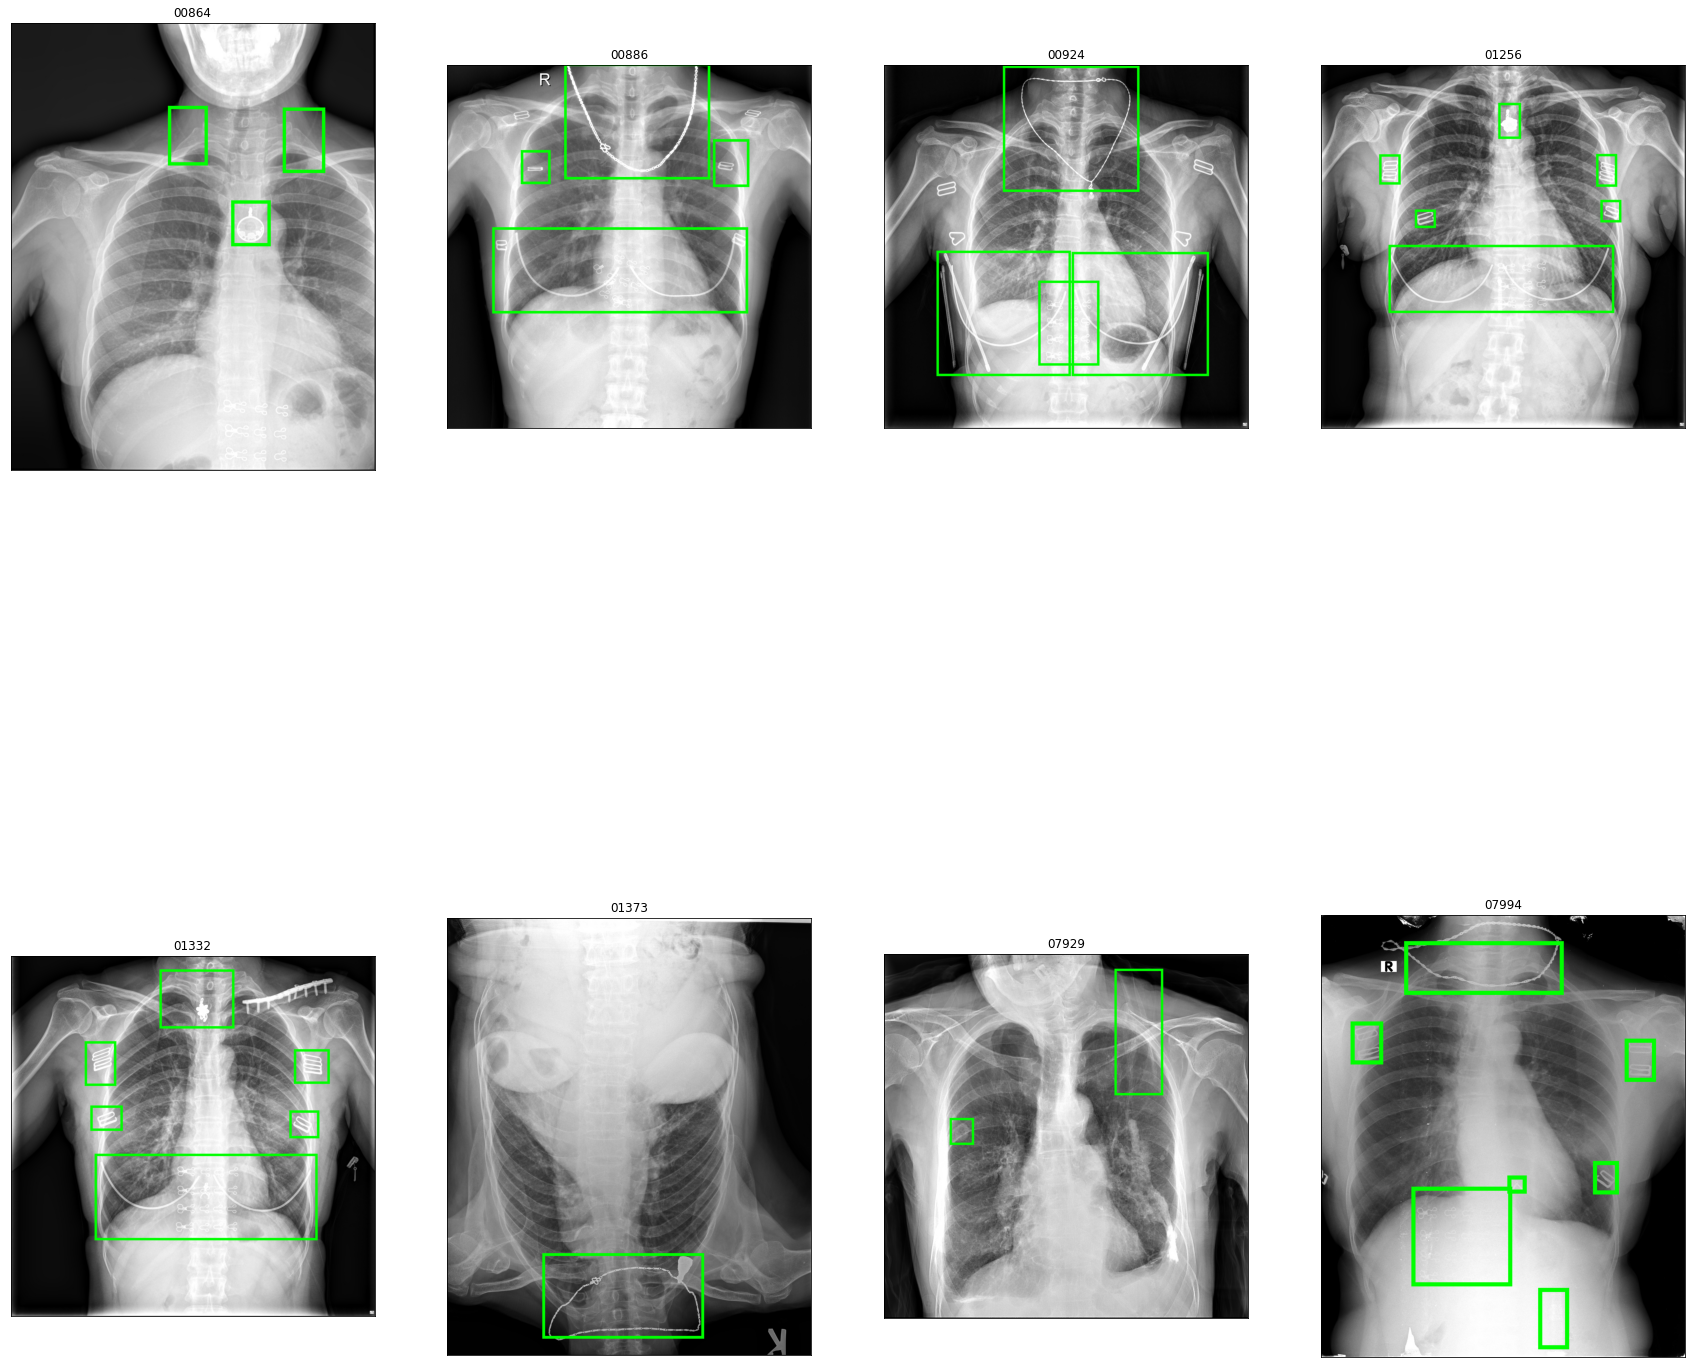

In [26]:
DIRECTORY = '/content/drive/MyDrive/MIP Resource/ChestXrayDataSet/object-CXR/labels/train/'
IMAGES_DIRECTORY = '/content/drive/MyDrive/MIP Resource/ChestXrayDataSet/preparedDataSet/images/train/'
SUBDIR = ['train', 'dev']



samples = [864, 886, 924, 1256, 1332, 1373, 7929, 7994]
fig, axs = plt.subplots(2, 4, subplot_kw=dict(xticks=[], yticks=[]), figsize=(30, 30))
axs = list(axs[0]) + list(axs[1])


# Iterate images through sample list and get its annotations
for sample, ax in zip(samples, axs):
  f = open(DIRECTORY + '{:05}'.format(sample) + '.txt')
  image = Image.open(IMAGES_DIRECTORY + '{:05}'.format(sample) + '.jpg').convert('RGB')
  size = image.size
  print(size)
  for line in f:
    line = list(map(float, line.split(' ')))
    width = line[3] * size[0]
    height = line[4] * size[1]
    x_min = line[1] * size[0] - width/2
    #print(line)
    x_max = line[1] * size[0] + width/2
    y_min = line[2] * size[1] - height/2
    y_max = line[2] * size[1] + height/2
    anno = [x_min,y_min,x_max,y_max]
    anno = list(map(int, anno))
    #print(anno)
    draw = ImageDraw.Draw(image, mode = 'RGB')
    contour_color = (0, 255, 0)
    draw.rectangle(anno, outline=contour_color, width=20)
  #draw_object(image, annotations)
  ax.set_title('{:05}'.format(sample))
  ax.imshow(image)

In [27]:
!mv '/content/drive/MyDrive/MIP Resource/ChestXrayDataSet/object-CXR/labels' '/content/drive/MyDrive/MIP Resource/ChestXrayDataSet/preparedDataSet'

## Calculate AUC and ROC